# Numpy crash course

Welcome to this project! Let's get to know NumPy.

 - NumPy is the core library for scientific computing in Python. 
 - Foundational Python libraries are built on top of NumPy's API.

### Importing the NumPy package

In [1]:
# Import NumPy
import numpy as np

### NumPy's main object: arrays

NumPy arrays store data in any number of dimensions. Here's a look at one, two, and three-dimensional arrays:

<img src="./assets/arrays.png" 
     width="600" 
     height="700" />

NumPy arrays can be created from:
- Python lists
- `.csv` files
- NumPy functions such as `np.arange()`
- ...and more!

## Creating arrays from lists

We can create an array from a Python list using the `np.array()` function.

To make a one-dimensional array, pass the list as an argument to `np.array()`:  

`new_array = np.array(list_name)`

To make a two-dimensional array, pass a tuple of lists as an argument to `np.array()`:  

`new_array = np.array((list_name_1, list_name_2))`

In [2]:
# Let's start with a few lists
list_1 = [1, 2, 3]
list_2 = [4, 5, 6]

In [3]:
# Create a 1-dimensional array from list_1
array_from_list_1 = np.array(list_1)
array_from_list_1

array([1, 2, 3])

In [5]:
# Create a 2-dimensional array from list_1 and list_2
array_from_list_1_and_2 = np.array((list_1, list_2))
array_from_list_1_and_2

array([[1, 2, 3],
       [4, 5, 6]])

### Creating arrays from a range

We can create 1-dimensional arrays from a range by passing range start and stop values to `np.arange()`:  

`np.arange(start, stop)`

In [7]:
# Create a 1-dimensional array of values starting at 10 and ending with 25
array_from_arange = np.arange(10,26)
array_from_arange

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

### Reshaping arrays

Once we have data stored in an array, NumPy provides huge flexibility manipulating it. One example is reshaping using the `.reshape()` method. Reshape an array by passing a tuple of the desired dimension lengths to `.reshape()`. We'd reshape to a two-dimensional array like so:  

`array.reshape((num_rows, num_columns))`

In [8]:
# Reshape the array_from_arange we just created so that it has eight rows and two columns
array_from_arange.reshape((8,2))

array([[10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19],
       [20, 21],
       [22, 23],
       [24, 25]])

### "n-dimensional" arrays

NumPy arrays are sometimes called n-dimensional arrays because they can have any number of dimensions. 

If we think of a three-dimensional array as a list of two-dimensional arrays, the first value is the number of two-dimensional arrays in the list, and the last two values are the number of rows and columns in each two-dimensional array. We can create a three-dimensional array by using this syntax:

`array.reshape((num_2d_arrays, num_rows, num_columns))`

In [9]:
# Reshape the array_from_arange we just created so that it is presented as a list of four 2d arrays
# Each 2d array will have two rows and two columns
array_from_arange.reshape((4, 2, 2))

array([[[10, 11],
        [12, 13]],

       [[14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21]],

       [[22, 23],
        [24, 25]]])

Pretty cool! NumPy can create arrays of any number of dimensions, which can be hard to wrap your head around. For example, you could think of a four-dimensional array as an array of three-dimensional arrays. Here's a picture... but let's move on before we get stuck in the wrong dimension.

<img src="./assets/4D_array.png" 
     width="400" 
     height="400" />

### Array Limitations

If you've worked in pandas, you may notice some key differences between arrays and dataframes.
- NumPy arrays have no column names
- All data within an array must be of the same type. This can lead to type coercion. 

#### Type coercion

Type coercion can occur if we try to make an array out of a Python list with several data types, since NumPy will change the data so that it is all of one type. Let's look at an example.

In [10]:
array_with_boolean = np.array([[1, 2, 3], [4, 5, True]])
array_with_boolean 

array([[1, 2, 3],
       [4, 5, 1]])

Here, we created an array out of lists which include both integers and booleans, NumPy automatically makes the boolean into a number, 1. Since NumPy did this without us telling it to, this is type coercion. NumPy acted this way because while booleans are easily cast into integers, integers are not easily cast into booleans while still preserving the original data. Here's another example of type coercion:

In [11]:
array_with_string = np.array([[1, 2, 3], [4, 5, "Hello world!"]])
array_with_string

array([['1', '2', '3'],
       ['4', '5', 'Hello world!']], dtype='<U21')

Now, all of our integers have been cast into strings.  

Ultimately, though, these limitations are worth it! Let's look at why.

## What sets NumPy apart? Why should I use arrays?

NumPy has so many great qualities, which become especially important when working with large numerical datasets.
- Speed!
- Ability to handle data of any dimension!
- Lots of great built-in functions and methods!


### How does NumPy achieve these results?

Because all elements in a NumPy array must be the same data type, NumPy is able to outsource tasks to C, a low-level programming language known for its speed and efficient memory usage. Delegating tasks to C is a big reason for NumPy's own efficiency!

<img src="./assets/numpy_python_C.png" 
     width="800" 
     height="600" />

## A closer look at one of NumPy's excellent functions

### Find and replace with `np.where()`

`np.where()` can check whether elements meet a condition and then pull one element if the condition is met and another if not. It uses this syntax:

`np.where(condition, replacement_if_true, replacement_if_false)`

In [13]:
# Here's an array for us to experiment with
array = np.array([[1, 2, 3], [4, 5, 6]])

# Replace all the even numbers in `array` with zeros
updated_array = np.where(array % 2 == 0, 0, array)
updated_array

array([[1, 0, 3],
       [0, 5, 0]])

## Case study: image data! 🖼

NumPy is great for image data because image datasets are large, and data for each image is often three dimensional!
We'll use RGB image data in this example.

RGB image data stores the color of each pixel in an image as a combination of a red value, a green value, and a blue value (in that order). 

Here's an example array and a visual representation of the data it stores:

In [14]:
rgb_example = np.array([[[255, 0, 0], [255, 255, 0], [255, 255, 255]],
               			[[255, 0, 255], [0, 255, 0], [0, 255, 255]],
               			[[0, 0, 0], [0, 255, 255], [0, 0, 255]]])

<img src="./assets/rgb_multicolor.png" 
     width="500" 
     height="600" />

Let's look at how the red, green and blue values in our array are combined to create the color for a single pixel. We can do this with the help of Matplotlib's `pyplot` methods.

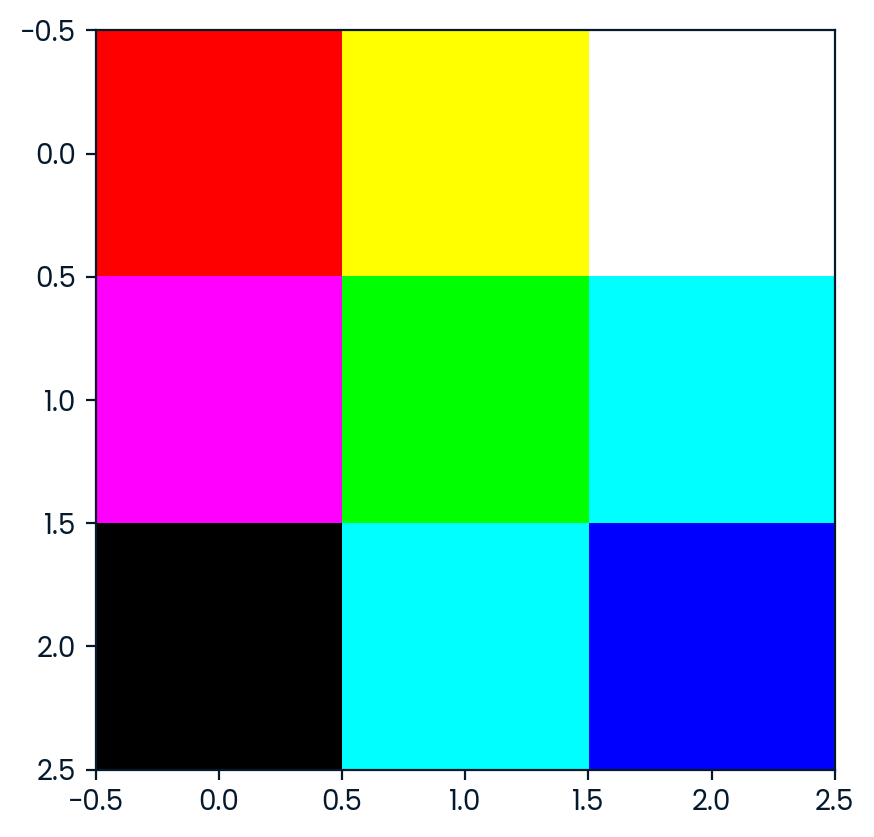

In [15]:
import matplotlib.pyplot as plt
plt.imshow(rgb_example)
plt.show()

### Our image data

Now let's look at a real image, albeit a simple one: the DataCamp logo! The logo rgb information is already stored in a NumPy array and saved as a `.npy` file called `dc_logo_rgb_array.npy` in the data folder. We can load the array using `np.load()`:

In [16]:
# Load logo array
black_logo = np.load("data/dc_logo_rgb_array.npy")
# Take a look at its contents
black_logo

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Now, let's visualize the image using `pyplot` to see how it looks.

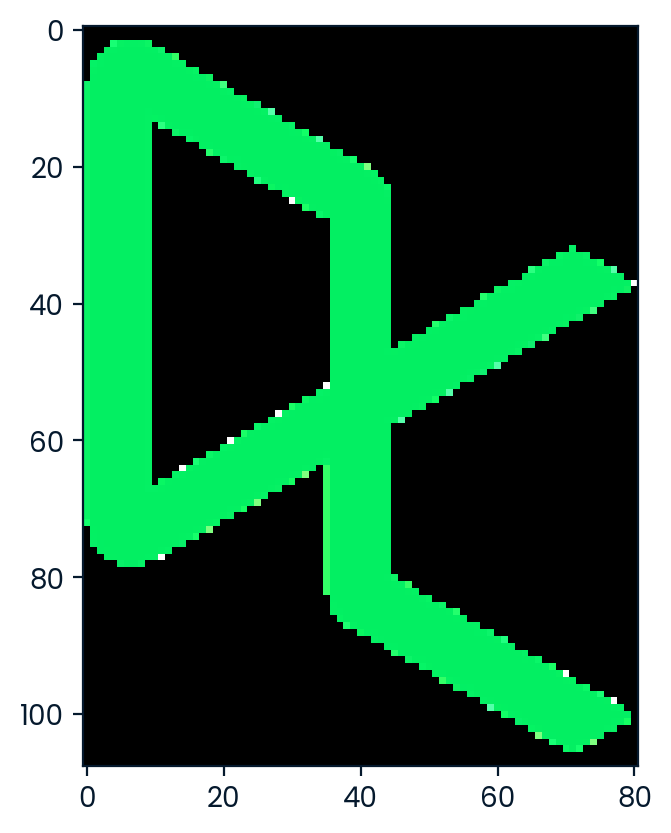

In [17]:
plt.imshow(black_logo)
plt.show()

Great, it looks like we've got a green DataCamp logo on a black background. But what if we want a white background, or a pink logo on a back background? Achieving this is as simple as writing a single line of code in NumPy!

### Using `np.where()` to manipulate our image

#### Creating a white logo

In [18]:
# Use your np.where() skills to replace all 255 values with the value representing white
# Recall that a white pixel is created when the red, green, and blue values are all 255
white_logo = np.where(black_logo == 0, 255, black_logo)

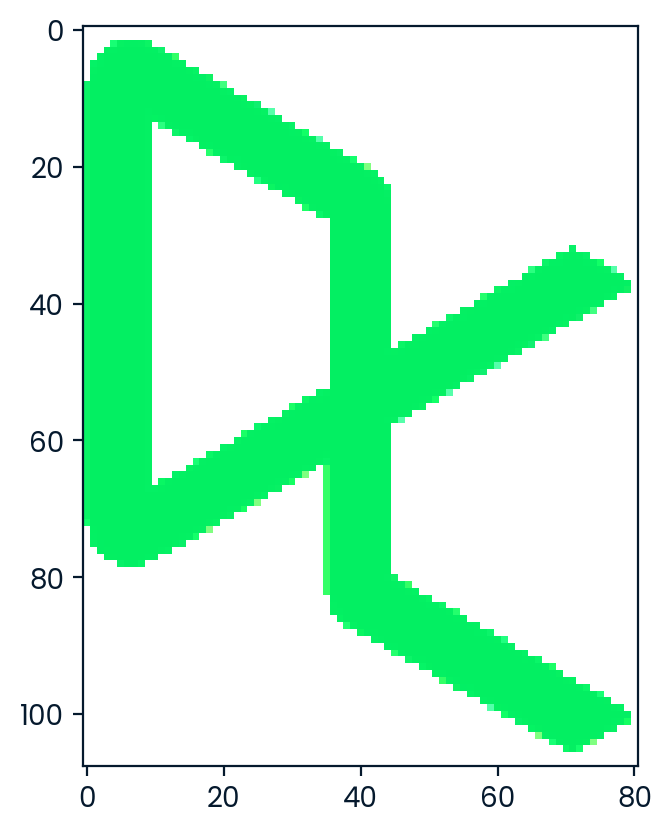

In [19]:
# Did that work? Let's check.
plt.imshow(white_logo)
plt.show()

#### Creating a pink and black logo

Let's go back to our black and green logo and assume that we like the black background, but we want to replace the green with DataCamp's pink color, which has the following values:
- Red: 255
- Green: 110
- Blue: 169

We can do this by replacing all pixels which are _not_ black (black is represented with [0, 0, 0]) with a pink pixel. 

In [22]:
# Replace all instances of [0, 0, 0] with a 1D array of the rgb values for DataCamp pink
pink_black_logo = np.where(black_logo != [0,0,0], [255,110,169], black_logo)

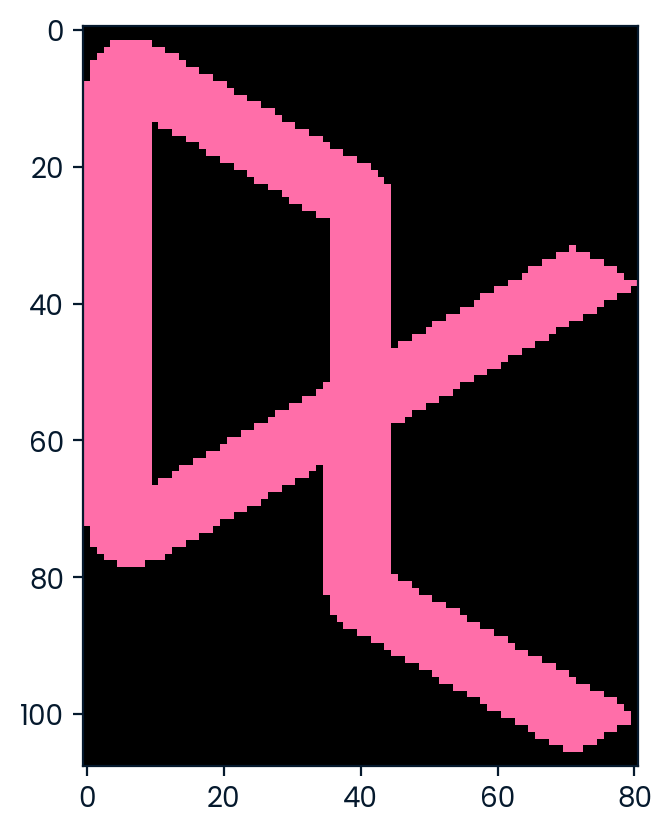

In [23]:
# Did that work? Let's check.
plt.imshow(pink_black_logo)
plt.show()

## What else can NumPy do?

#### So much! If you're doing work with large numerical datasets, consider learning more about NumPy.

- Statisitcs
- Linear algebra
- Data cleaning and augmentation
- Machine learning inputs